<a href="https://colab.research.google.com/github/Quanglinhdzdellchiudc22/VECM/blob/main/VECM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
from scipy import fft, stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/time_series/GOLD.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,26.625,30.125,26.625,29.375,20.754421,41074000
1,1996-02-01,29.875,32.875,29.875,30.250,21.372637,46490100
2,1996-03-01,30.250,32.000,28.250,30.375,21.460953,36573500
3,1996-04-01,30.250,32.125,29.375,30.625,21.637589,34821300
4,1996-05-01,30.625,32.125,29.750,31.500,22.255806,27064600


In [5]:
missing_per_column = df.isnull().sum()
print("Số lượng giá trị thiếu theo cột:")
print(missing_per_column)

Số lượng giá trị thiếu theo cột:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
# 1. Kiểm tra số lượng NaN theo từng cột
nan_counts = df.isna().sum()
print("Số lượng giá trị NaN theo cột:")
print(nan_counts)

Số lượng giá trị NaN theo cột:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [9]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Kiểm tra tính đứng yên (ADF Test)
def adf_test(series, name):
    result = adfuller(series)
    print(f'ADF Test for {name}: p-value = {result[1]}')
    if result[1] > 0.05:
        print(f'{name} is non-stationary')
    else:
        print(f'{name} is stationary')

for col in ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']:
    adf_test(df[col], col)

# Kiểm tra đồng liên kết (Engle-Granger) giữa Close và Adj Close
coint_result = coint(df['Close'], df['Adj Close'])
print(f'Engle-Granger Cointegration Test (Close vs Adj Close): p-value = {coint_result[1]}')
if coint_result[1] < 0.05:
    print('Close and Adj Close are cointegrated')
else:
    print('Close and Adj Close are not cointegrated')

# Kiểm tra đồng liên kết nhiều chuỗi (Johansen Test)
johansen_data = df[['Open', 'High', 'Low', 'Close', 'Adj Close']]
result = coint_johansen(johansen_data, det_order=0, k_ar_diff=1)
print('Johansen Test Eigenvalues:', result.eig)

ADF Test for Open: p-value = 0.4254697742440677
Open is non-stationary
ADF Test for High: p-value = 0.3256683240166304
High is non-stationary
ADF Test for Low: p-value = 0.3325336281037129
Low is non-stationary
ADF Test for Close: p-value = 0.32589269612733135
Close is non-stationary
ADF Test for Adj Close: p-value = 0.3434048934159057
Adj Close is non-stationary
ADF Test for Volume: p-value = 0.27343315433395715
Volume is non-stationary
Engle-Granger Cointegration Test (Close vs Adj Close): p-value = 0.8836901490765156
Close and Adj Close are not cointegrated
Johansen Test Eigenvalues: [0.47357872 0.32206409 0.11460374 0.01161883 0.00411899]


Johansen Test Rank: 3
VECM Results Summary:
Det. terms outside the coint. relation & lagged endog. parameters for equation Open
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1150      0.029     -4.024      0.000      -0.171      -0.059
L1.Open          0.0281      0.019      1.447      0.148      -0.010       0.066
L1.High          0.0152      0.021      0.709      0.478      -0.027       0.057
L1.Low          -0.0732      0.024     -3.064      0.002      -0.120      -0.026
L1.Close         0.1223      0.118      1.033      0.302      -0.110       0.354
L1.Adj Close     0.0183      0.121      0.151      0.880      -0.220       0.256
Det. terms outside the coint. relation & lagged endog. parameters for equation High
                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------

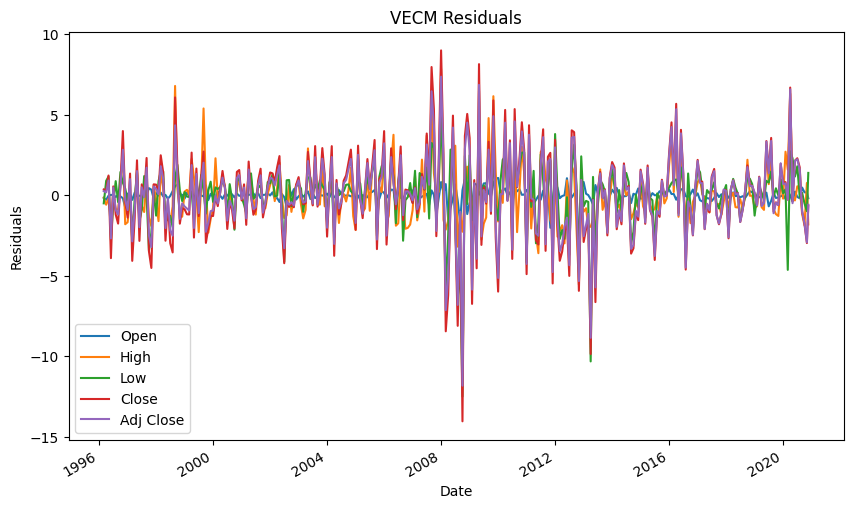

ADF Test for residuals of Open: p-value = 0.00041997314055956694
Residuals of Open are stationary
ADF Test for residuals of High: p-value = 0.0005198064312064062
Residuals of High are stationary
ADF Test for residuals of Low: p-value = 9.347223801955346e-30
Residuals of Low are stationary
ADF Test for residuals of Close: p-value = 6.249953478300307e-30
Residuals of Close are stationary
ADF Test for residuals of Adj Close: p-value = 0.00015496820488161792
Residuals of Adj Close are stationary


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.vector_ar.vecm import VECM, select_coint_rank
from statsmodels.tsa.stattools import adfuller
from google.colab import drive


# Đảm bảo cột Date được định dạng datetime
df['Date'] = pd.to_datetime(df['Date'])

# Chọn các cột để phân tích
vecm_data = df[['Open', 'High', 'Low', 'Close', 'Adj Close']]

# Kiểm tra số lượng mối quan hệ đồng liên kết (Johansen Test)
rank_test = select_coint_rank(vecm_data, det_order=0, k_ar_diff=1, method='trace', signif=0.05)
print("Johansen Test Rank:", rank_test.rank)

# Xây dựng mô hình VECM
model = VECM(vecm_data, k_ar_diff=1, coint_rank=rank_test.rank, deterministic='co')
results = model.fit()

# In kết quả
print("VECM Results Summary:")
print(results.summary())

# Hệ số đồng liên kết (mối quan hệ dài hạn)
print("Cointegration Coefficients (Long-term relationship):")
print(results.beta)

# Hệ số điều chỉnh (tốc độ điều chỉnh về cân bằng)
print("Adjustment Coefficients:")
print(results.alpha)

# Chuyển phần dư (residuals) thành DataFrame
# Cắt df['Date'] để khớp với số hàng của results.resid (298 hàng)
nobs = results.resid.shape[0]  # Số quan sát trong phần dư
residuals = pd.DataFrame(results.resid, columns=['Open', 'High', 'Low', 'Close', 'Adj Close'],
                         index=df['Date'].iloc[-nobs:])

# Vẽ biểu đồ phần dư
residuals.plot(figsize=(10, 6), title='VECM Residuals')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend(residuals.columns)
plt.show()  # Sửa lỗi cú pháp từ plt?, thành plt.show()

# Kiểm tra tính đứng yên của phần dư bằng ADF Test
for col in residuals.columns:
    adf_result = adfuller(residuals[col].dropna())
    print(f'ADF Test for residuals of {col}: p-value = {adf_result[1]}')
    if adf_result[1] < 0.05:
        print(f'Residuals of {col} are stationary')
    else:
        print(f'Residuals of {col} are non-stationary')